# Read dataset

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Read dataset from directory
dir_data = './data/'
raw_data = os.path.join(dir_data, 'iris.data')
data = np.genfromtxt(raw_data, delimiter=",", dtype=str)
label = np.array(['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class'])

# Put txt files into DataFrame

In [5]:
arrange_data = []
for line in data:
    arrange_data.append(line)

df = pd.DataFrame(arrange_data)
df.columns = label

df=df.astype({'sepal length in cm':'float',
              'sepal width in cm':'float',
              'petal length in cm':'float',
              'petal width in cm':'float'})
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Split training data & testing data

In [15]:
iris_data = df[df.columns[:-1]]
iris_label = df['class']
train_data , test_data , train_label , test_label = train_test_split(iris_data, iris_label, test_size=0.33, stratify=iris_label)

# Convert dataframe into list
train_data = train_data.values.tolist()
train_label = train_label.values.tolist()
test_data = test_data.values.tolist()
test_label = test_label.values.tolist()

# KNN Algorithm(K = 5)
## Euclidean distance

In [16]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return distance**0.5

# Locate the most similar neighbors
def get_neighbors(train_data, train_label, test_row, num_neighbors):
    distances = []
    for index in range(len(train_data)):
        dist = euclidean_distance(test_row, train_data[index])
        distances.append((train_data[index], dist, train_label[index]))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append([distances[i][0], distances[i][-1]])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train_data, train_label, test_row, num_neighbors):
    neighbors = get_neighbors(train_data, train_label, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train_data, train_label, test_data, num_neighbors):
    predictions = []
    for row in test_data:
        output = predict_classification(train_data, train_label, row, num_neighbors)
        predictions.append(output)
    return predictions

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# define model parameter
num_neighbors = 5

pred = k_nearest_neighbors(train_data, train_label, test_data, num_neighbors)
print("Accuracy: %.2f %%" % accuracy_metric(test_label, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, pred))
print("\nClassification Report:")
print(classification_report(test_label, pred))

Accuracy: 92.00 %

Confusion Matrix:
[[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.84      0.94      0.89        17
 Iris-virginica       0.93      0.82      0.87        17

      micro avg       0.92      0.92      0.92        50
      macro avg       0.93      0.92      0.92        50
   weighted avg       0.92      0.92      0.92        50



### Compare the accuracy with different values of K (Euclidean distance)

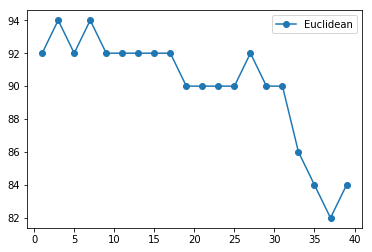

In [17]:
K_accuracy_euclidean = []
for values in range(1, 41, 2):
    pred = k_nearest_neighbors(train_data, train_label, test_data, values)
    K_accuracy_euclidean.append(accuracy_metric(test_label, pred))
plt.plot(range(1, 41, 2), K_accuracy_euclidean, label="Euclidean", marker='o')
plt.legend()
plt.show()

## Chebyshev distance

In [18]:
# Calculate the Chebyshev distance between two vectors
def chebyshev_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += np.max(np.abs(row1[i] - row2[i]))
    return distance

# Locate the most similar neighbors
def get_neighbors(train_data, train_label, test_row, num_neighbors):
    distances = []
    for index in range(len(train_data)):
        dist = chebyshev_distance(test_row, train_data[index])
        distances.append((train_data[index], dist, train_label[index]))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append([distances[i][0], distances[i][-1]])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train_data, train_label, test_row, num_neighbors):
    neighbors = get_neighbors(train_data, train_label, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train_data, train_label, test_data, num_neighbors):
    predictions = []
    for row in test_data:
        output = predict_classification(train_data, train_label, row, num_neighbors)
        predictions.append(output)
    return predictions

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# define model parameter
num_neighbors = 5

pred = k_nearest_neighbors(train_data, train_label, test_data, num_neighbors)
print("Accuracy: %.2f %%" % accuracy_metric(test_label, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, pred))
print("\nClassification Report:")
print(classification_report(test_label, pred))

Accuracy: 92.00 %

Confusion Matrix:
[[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.84      0.94      0.89        17
 Iris-virginica       0.93      0.82      0.87        17

      micro avg       0.92      0.92      0.92        50
      macro avg       0.93      0.92      0.92        50
   weighted avg       0.92      0.92      0.92        50



### Compare the accuracy with different values of K (Chebyshev distance)

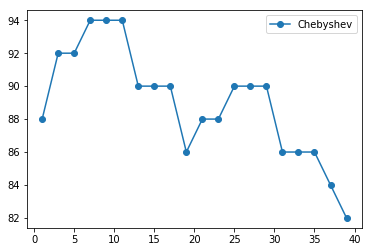

In [19]:
K_accuracy_chebyshev = []
for values in range(1, 41, 2):
    pred = k_nearest_neighbors(train_data, train_label, test_data, values)
    K_accuracy_chebyshev.append(accuracy_metric(test_label, pred))
plt.plot(range(1, 41, 2), K_accuracy_chebyshev, label="Chebyshev", marker='o')
plt.legend()
plt.show()

## Jaccard similarity

In [20]:
# Calculate the Jaccard similarity between two vectors
def jaccard_similarity(row1, row2):
    s1 = set(row1)
    s2 = set(row2)
    return 1 - (len(s1.intersection(s2)) / len(s1.union(s2)))

# Locate the most similar neighbors
def get_neighbors(train_data, train_label, test_row, num_neighbors):
    distances = []
    for index in range(len(train_data)):
        dist = jaccard_similarity(test_row, train_data[index])
        distances.append((train_data[index], dist, train_label[index]))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append([distances[i][0], distances[i][-1]])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train_data, train_label, test_row, num_neighbors):
    neighbors = get_neighbors(train_data, train_label, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train_data, train_label, test_data, num_neighbors):
    predictions = []
    for row in test_data:
        output = predict_classification(train_data, train_label, row, num_neighbors)
        predictions.append(output)
    return predictions

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# define model parameter
num_neighbors = 5

pred = k_nearest_neighbors(train_data, train_label, test_data, num_neighbors)
print("Accuracy: %.2f %%" % accuracy_metric(test_label, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, pred))
print("\nClassification Report:")
print(classification_report(test_label, pred))

Accuracy: 68.00 %

Confusion Matrix:
[[13  1  2]
 [ 4  9  4]
 [ 0  5 12]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.76      0.81      0.79        16
Iris-versicolor       0.60      0.53      0.56        17
 Iris-virginica       0.67      0.71      0.69        17

      micro avg       0.68      0.68      0.68        50
      macro avg       0.68      0.68      0.68        50
   weighted avg       0.68      0.68      0.68        50



### Compare the accuracy with different values of K (Jaccard similarity)

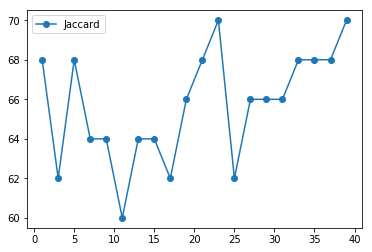

In [21]:
K_accuracy_jaccard = []
for values in range(1, 41, 2):
    pred = k_nearest_neighbors(train_data, train_label, test_data, values)
    K_accuracy_jaccard.append(accuracy_metric(test_label, pred))
plt.plot(range(1, 41, 2), K_accuracy_jaccard, label="Jaccard", marker='o')
plt.legend()
plt.show()

## Cosine similarity

In [22]:
# Calculate the Cosine similarity between two vectors
def cosine_similarity(row1, row2):
    dot = np.dot(row1, row2)
    norma = np.linalg.norm(row1)
    normb = np.linalg.norm(row2)
    return dot / (norma * normb)

# Locate the most similar neighbors
def get_neighbors(train_data, train_label, test_row, num_neighbors):
    distances = []
    for index in range(len(train_data)):
        dist = cosine_similarity(test_row, train_data[index])
        distances.append((train_data[index], dist, train_label[index]))
    distances.sort(key=lambda tup: tup[1], reverse=True)
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append([distances[i][0], distances[i][-1]])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train_data, train_label, test_row, num_neighbors):
    neighbors = get_neighbors(train_data, train_label, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train_data, train_label, test_data, num_neighbors):
    predictions = []
    for row in test_data:
        output = predict_classification(train_data, train_label, row, num_neighbors)
        predictions.append(output)
    return predictions

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# define model parameter
num_neighbors = 5

pred = k_nearest_neighbors(train_data, train_label, test_data, num_neighbors)
print("Accuracy: %.2f %%" % accuracy_metric(test_label, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, pred))
print("\nClassification Report:")
print(classification_report(test_label, pred))

Accuracy: 98.00 %

Confusion Matrix:
[[16  0  0]
 [ 0 16  1]
 [ 0  0 17]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        17

      micro avg       0.98      0.98      0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



### Compare the accuracy with different values of K (Cosine similarity)

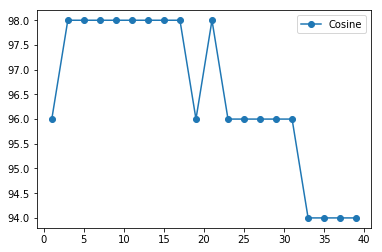

In [23]:
K_accuracy_cosine = []
for values in range(1, 41, 2):
    pred = k_nearest_neighbors(train_data, train_label, test_data, values)
    K_accuracy_cosine.append(accuracy_metric(test_label, pred))
plt.plot(range(1, 41, 2), K_accuracy_cosine, label="Cosine", marker='o')
plt.legend()
plt.show()

# Compare the accuracy with different  similarity function

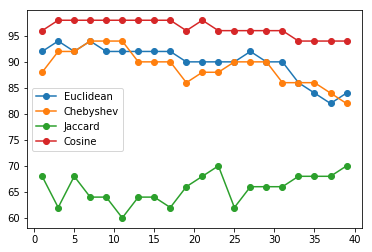

In [24]:
plt.plot(range(1, 41, 2), K_accuracy_euclidean, label="Euclidean", marker='o')
plt.plot(range(1, 41, 2), K_accuracy_chebyshev, label="Chebyshev", marker='o')
plt.plot(range(1, 41, 2), K_accuracy_jaccard, label="Jaccard", marker='o')
plt.plot(range(1, 41, 2), K_accuracy_cosine, label="Cosine", marker='o')
plt.legend()
plt.show()